# KIAM Week 01 : Task 2
## Quantitative analysis using pynance and TaLib

●	Tasks:

○	Use additional finance data

○	Load and prepare the data.

■	Load your stock price data into a pandas DataFrame. Ensure your data includes columns like Open, High, Low, Close, and Volume.	

○	Apply Analysis Indicators with TA-Lib 

■	You can use TA-Lib to calculate various technical indicators such as moving averages, RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence)

○	Use PyNance for Financial Metrics

○	Visualize the Data

■	Create visualizations to better understand the data and the impact of different indicators on the stock price.

●	KPIs

○	Proactivity to self-learn - sharing references.

○	Accuracy of indicators

○	Completeness of Data Analysis

Minimum Essential To Do:

●	Merge the necessary branches from task-1 into the main branch using a Pull Request (PR)

●	Create at least one new branch called "task-2" for the ongoing development of the dashboard.

●	Commit your work with a descriptive commit message.

●	Prepare Your Data

●	Calculate Basic Technical Indicators

●	Visualize Data


In [1]:
# Import Essential Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import talib as ta
import pynance as pn

In [2]:
# Define file Locations

File_loc ={

"apple":"../Data/yfinance_data/Data/AAPL.csv",
"amazon":"../Data/yfinance_data/Data/AMZN.csv",
"google":"../Data/yfinance_data/Data/GOOG.csv",
"meta":"../Data/yfinance_data/Data/META.csv",
"microsoft":"../Data/yfinance_data/Data/MSFT.csv",
"nvidia":"../Data/yfinance_data/Data/NVDA.csv"
}

for i,j in File_loc.items():
    print(f' For Ticker {i} the file location is {j}')

 For Ticker apple the file location is ../Data/yfinance_data/Data/AAPL.csv
 For Ticker amazon the file location is ../Data/yfinance_data/Data/AMZN.csv
 For Ticker google the file location is ../Data/yfinance_data/Data/GOOG.csv
 For Ticker meta the file location is ../Data/yfinance_data/Data/META.csv
 For Ticker microsoft the file location is ../Data/yfinance_data/Data/MSFT.csv
 For Ticker nvidia the file location is ../Data/yfinance_data/Data/NVDA.csv


# Sub Tasks
## 1. load  & Prepare the Data

In [3]:
# Import Each Company's Data to a pandas data frame object

Merged_DF =pd.DataFrame()

for ticker_name , file_location in File_loc.items(): # Using a for Loop to avoid repeating each import process
    temp_df = pd.read_csv(file_location) # assigning a temporary data frame for each ticker's data
    temp_df['Company'] = ticker_name # adding a company column for each empor
    Merged_DF = pd.concat([Merged_DF, temp_df], ignore_index=True) # appending to the master df 

In [4]:
# Explore the Data

Merged_DF.head()

,Date,Close,High,Low,Open,Volume,Company
0,2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200,apple
1,2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400,apple
2,2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400,apple
3,2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800,apple
4,2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800,apple


In [5]:
# Statistics of the Data

Merged_DF.describe()

,Close,High,Low,Open,Volume
count,21793.000000,21793.000000,21793.000000,21793.000000,2.179300e+04
mean,68.347219,69.105289,67.540900,68.321511,1.736744e+08
std,78.674414,79.561564,77.735952,78.641479,2.458876e+08
min,0.165269,0.171228,0.162289,0.165269,1.584340e+05
25%,13.381500,13.551883,13.228000,13.400000,3.195148e+07
50%,33.492298,33.798000,33.205768,33.465321,7.038000e+07
75%,105.150002,106.254972,103.859746,105.021302,2.035992e+08
max,379.838379,381.975166,376.488998,379.341431,3.692928e+09


In [6]:
# Check for missing values

Merged_DF.isnull().sum()

Date       0
Close      0
High       0
Low        0
Open       0
Volume     0
Company    0
dtype: int64

In [7]:
#check for dupplicates
Merged_DF.duplicated().sum()

np.int64(0)

In [8]:
# Check the Size & Shape of the Data

print(Merged_DF.size)
print(Merged_DF.shape)

152551
(21793, 7)


In [9]:
# Convert 'Date' to datetime 
Merged_DF['Date'] = pd.to_datetime(Merged_DF['Date'])
Merged_DF = Merged_DF.sort_values(['Company', 'Date'])

# Rename columns to standard TA-Lib expected names (optional, but good practice)
Merged_DF.rename(columns={
    'Close': 'close',
    'High': 'high',
    'Low': 'low',
    'Open': 'open',
    'Volume': 'volume'
}, inplace=True)

# Check for non-numeric data in required columns
required_cols = ['close', 'high', 'low', 'open', 'volume']
for col in required_cols:
    Merged_DF[col] = pd.to_numeric(Merged_DF[col], errors='coerce')
    
Merged_DF.dropna(subset=required_cols, inplace=True)

print("Data Preparation Complete. Ready for Analysis.")

Data Preparation Complete. Ready for Analysis.


# Sub Tasks
## 2. Apply Analysis Indicators with TA-Lib 

We will use the groupby() method to apply TA-Lib indicators to each company separately. This ensures, for example, that the 14-day RSI for Apple isn't influenced by Amazon's price data.

In [10]:
# Write a Function to apply the indicators

def add_indicators(df):
    df['SMA_20'] = ta.SMA(df['close'], timeperiod=20)
    df['SMA_50'] = ta.SMA(df['close'], timeperiod=50)
    df['RSI_14'] = ta.RSI(df['close'], timeperiod=14)
    
    macd, macd_signal, macd_hist = ta.MACD(
        df['close'],
        fastperiod=12,
        slowperiod=26,
        signalperiod=9
    )
    
    df['MACD'] = macd
    df['MACD_signal'] = macd_signal
    df['MACD_hist'] = macd_hist
    
    return df

# Apply the function to each company group
Analyzed_DF = Merged_DF.groupby("Company").apply(add_indicators).reset_index(drop=True)

C:\Users\henokt\AppData\Local\Temp\ipykernel_53192\3468233428.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Analyzed_DF = Merged_DF.groupby("Company").apply(add_indicators).reset_index(drop=True)


In [11]:
Analyzed_DF.head()

,Date,close,high,low,open,volume,Company,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,MACD_hist
0,2009-01-02,2.718,2.7265,2.5535,2.5675,145928000,amazon,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,2.703,2.7870,2.6515,2.7865,190196000,amazon,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,2.868,2.9110,2.6875,2.7275,221602000,amazon,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,2.810,2.8475,2.7675,2.8145,158854000,amazon,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,2.858,2.8660,2.7290,2.7495,131558000,amazon,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Check Avergae Indicators

Analyzed_DF.groupby('Company')[['SMA_20','SMA_50','RSI_14']].agg([np.mean,np.max,np.min])

C:\Users\henokt\AppData\Local\Temp\ipykernel_53192\2835269750.py:3: FutureWarning: The provided callable <function mean at 0x0000018651142B60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Analyzed_DF.groupby('Company')[['SMA_20','SMA_50','RSI_14']].agg([np.mean,np.max,np.min])
C:\Users\henokt\AppData\Local\Temp\ipykernel_53192\2835269750.py:3: FutureWarning: The provided callable <function max at 0x0000018651142160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  Analyzed_DF.groupby('Company')[['SMA_20','SMA_50','RSI_14']].agg([np.mean,np.max,np.min])
C:\Users\henokt\AppData\Local\Temp\ipykernel_53192\2835269750.py:3: FutureWarning: The provided callable <function min at 0x00000186511422A0> is currently using SeriesGroupBy.min. In a futu

SMA_20                             SMA_50              \
                 mean         max        min        mean         max   
Company                                                                
amazon      59.318428  181.521350   2.615850   59.199726  173.848660   
apple       53.619188  192.490633   2.661195   53.284685  185.199314   
google      50.667995  146.949910   7.885330   50.502399  145.190277   
meta       156.524817  371.134071  19.141498  156.292233  361.525703   
microsoft  102.008748  369.725937  12.115496  101.306925  358.635943   
nvidia       6.707341   48.046003   0.183366    6.569826   46.658888   

                         RSI_14                        
                 min       mean        max        min  
Company                                                
amazon      2.966330  54.565463  89.384094  21.168752  
apple       2.733174  56.016263  90.695350  21.030028  
google      8.157327  54.332977  89.071293  22.277545  
meta       20.052383  53.814824  89.389523  18.511759  
microsoft  12.894796  55.004406  89.265423  18.283380  
nvidia      0.191038  54.520716  91.420718  18.890754

2. Apply Financial Metrics with PyNance

In [20]:
def add_ta_indicators(df):
    # Ensure the DataFrame is sorted by the index (which should be 'Date')
    # If 'Date' is a column, sort by it:
    df = df.sort_values("Date")

    # Type casting is good practice, but TA-Lib functions expect NumPy arrays.
    # .values extracts the underlying NumPy array.
    close = df["close"].astype(float).values
    high  = df["high"].astype(float).values
    low   = df["low"].astype(float).values

    # === Moving averages (Using TA-Lib) ===
    # Using TA-Lib's MA function, which is often named differently than simple 'sma' in packages.
    df["SMA_20"] = ta.SMA(close, timeperiod=20)
    df["SMA_50"] = ta.SMA(close, timeperiod=50)
    df["EMA_20"] = ta.EMA(close, timeperiod=20)

    # === Momentum Indicators ===
    df["RSI_14"] = ta.RSI(close, timeperiod=14)
    # TA-Lib has MOM and ROC (Rate of Change)
    df["Momentum_10"] = ta.MOM(close, timeperiod=10)
    df["ROC_10"] = ta.ROC(close, timeperiod=10)

    # === Volatility / Overbought indicators ===
    df["CCI_20"] = ta.CCI(high, low, close, timeperiod=20)
    df["WILLR_14"] = ta.WILLR(high, low, close, timeperiod=14)

    # === Linear Regression Slope ===
    # TA-Lib provides LINEARREG_SLOPE
    df["Slope_20"] = ta.LINEARREG_SLOPE(close, timeperiod=20)

    # === MACD Calculation using TA-Lib's specialized MACD function ===
    # TA-Lib provides the three MACD components directly
    macd, signal, hist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    df["MACD"] = macd
    df["MACD_Signal"] = signal
    df["MACD_Hist"] = hist

    return df

# Apply per company
Financial_DF = (
    Analyzed_DF.groupby("Company", group_keys=False)
    .apply(add_ta_indicators) # ⬅️ Function name updated for clarity
)

C:\Users\henokt\AppData\Local\Temp\ipykernel_53192\3460746364.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(add_ta_indicators) # ⬅️ Function name updated for clarity


In [21]:
Financial_DF.head()

,Date,close,high,low,open,volume,Company,SMA_20,SMA_50,RSI_14,...,MACD_signal,MACD_hist,EMA_20,Momentum_10,ROC_10,CCI_20,WILLR_14,Slope_20,MACD_Signal,MACD_Hist
0,2009-01-02,2.718,2.7265,2.5535,2.5675,145928000,amazon,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,2.703,2.7870,2.6515,2.7865,190196000,amazon,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,2.868,2.9110,2.6875,2.7275,221602000,amazon,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,2.810,2.8475,2.7675,2.8145,158854000,amazon,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,2.858,2.8660,2.7290,2.7495,131558000,amazon,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sub Tasks
## 3.Visualization

1. Price and Trend Indicators (SMA/EMA)

c:\Users\henokt\OneDrive - Inchcape\Documents\GitHub\Predicting-Price-Moves-with-News-Sentiment-Week-1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


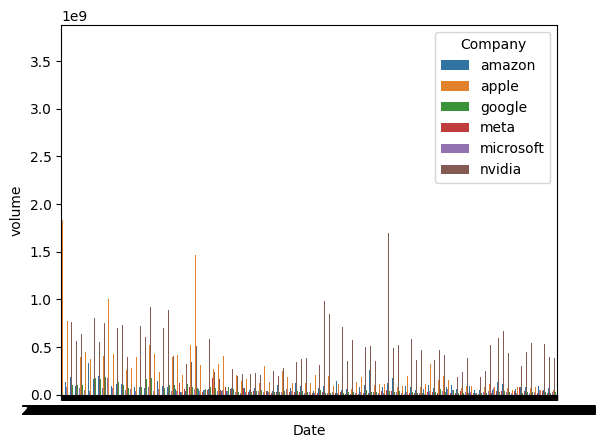

In [28]:
# Plot Daily Trading Volumes

sns.barplot(data=Financial_DF, x='Date', y='volume', hue='Company')
plt.show()

In [22]:
def plot_indicators_per_company(df):
    """
    Generates and displays (or saves) three technical analysis plots 
    (Price/SMA, RSI, MACD) for every unique company in the DataFrame.
    """
    
    unique_companies = df['Company'].unique()
    
    for company in unique_companies:
        # Filter the DataFrame for the current company
        company_df = df[df['Company'] == company].copy()
        
        print(f"\n--- Generating Plots for {company.upper()} ---")

        # 1. Price and Trend Indicators (Close Price and SMA)
        plt.figure(figsize=(12, 6))
        plt.plot(company_df.index, company_df['close'], label='Close Price', color='blue', linewidth=1.5)
        plt.plot(company_df.index, company_df['SMA_20'], label='SMA (20-day)', color='red', linestyle='--', alpha=0.7)
        
        plt.title(f'{company.capitalize()} Price vs. Trend Indicator (SMA)')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.legend()
        plt.grid(True, alpha=0.5)
        plt.show() # Or use plt.savefig(f'{company}_price_sma.png') to save the file
        
        # 2. Momentum Indicator: RSI
        plt.figure(figsize=(12, 4))
        plt.plot(company_df.index, company_df['RSI_14'], label='RSI (14-day)', color='purple')
        
        # Add overbought/oversold lines
        plt.axhline(70, linestyle='--', color='red', linewidth=1)
        plt.axhline(30, linestyle='--', color='green', linewidth=1)
        
        plt.title(f'{company.capitalize()} Relative Strength Index (RSI)')
        plt.xlabel('Date')
        plt.ylabel('RSI Value')
        plt.legend()
        plt.grid(True, alpha=0.5)
        plt.ylim(0, 100) 
        plt.show() # Or use plt.savefig(f'{company}_rsi.png')
        
        # 3. MACD Analysis
        plt.figure(figsize=(12, 5))

        # Plot MACD Line and Signal Line
        plt.plot(company_df.index, company_df['MACD'], label='MACD Line', color='blue', linewidth=1.5)
        plt.plot(company_df.index, company_df['MACD_Signal'], label='Signal Line', color='red', linewidth=1)

        # Plot MACD Histogram
        plt.bar(company_df.index, company_df['MACD_Hist'], label='Histogram', color='gray', alpha=0.5)

        plt.axhline(0, color='black', linestyle='-', linewidth=0.8) # Zero line
        plt.title(f'{company.capitalize()} MACD Indicator')
        plt.xlabel('Date')
        plt.ylabel('MACD Value')
        plt.legend()
        plt.grid(True, alpha=0.5)
        plt.show() # Or use plt.savefig(f'{company}_macd.png')


--- Generating Plots for AMAZON ---


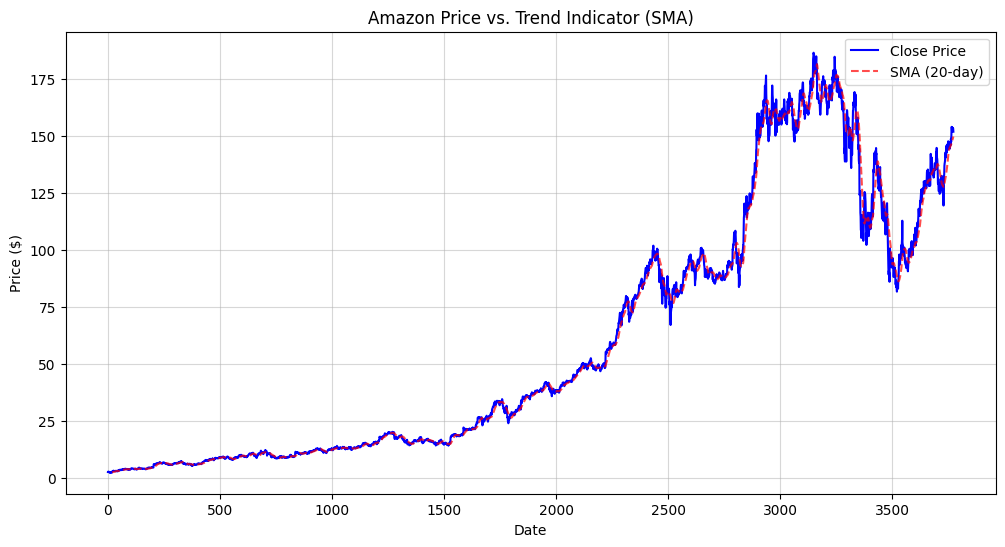

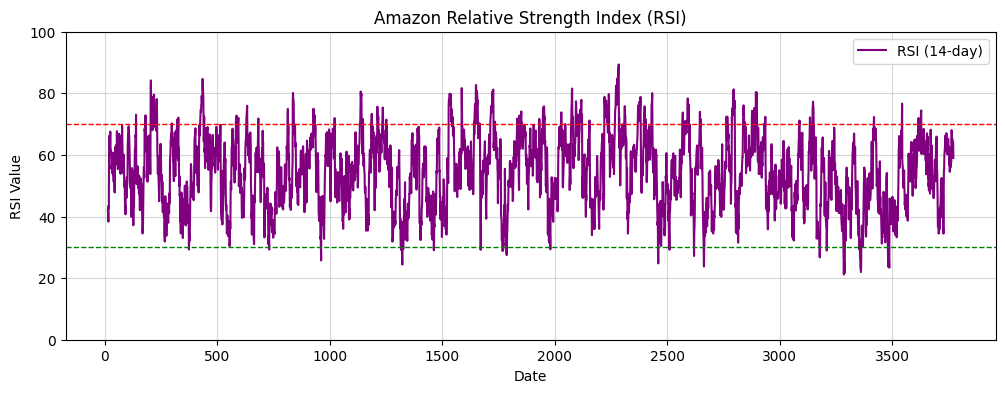

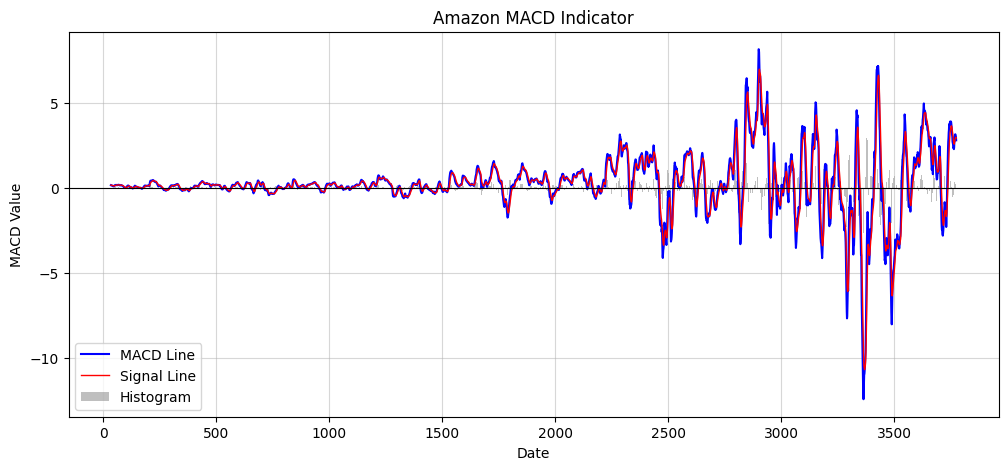


--- Generating Plots for APPLE ---


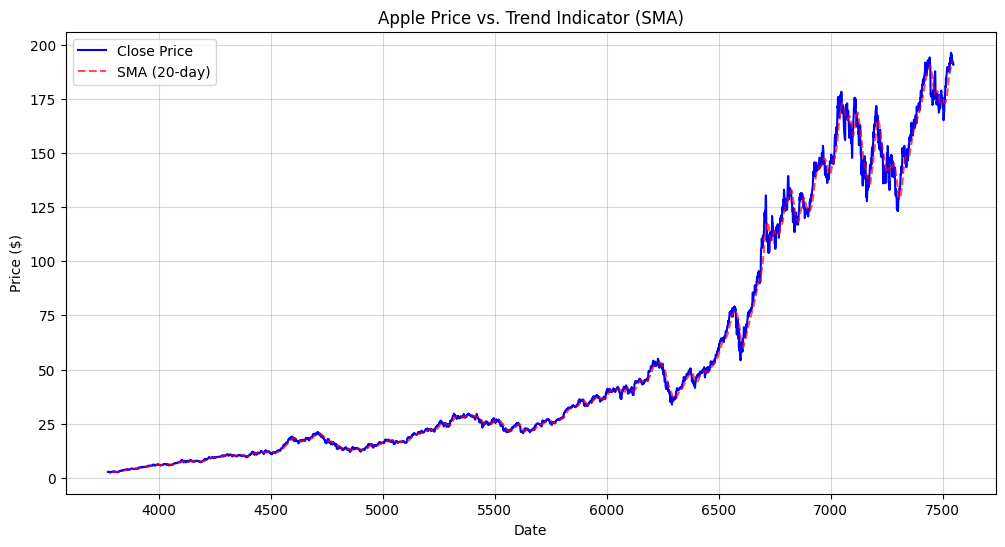

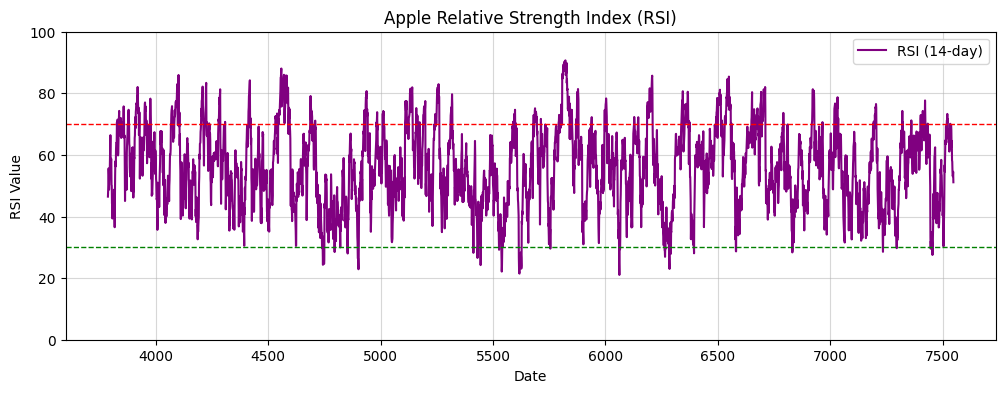

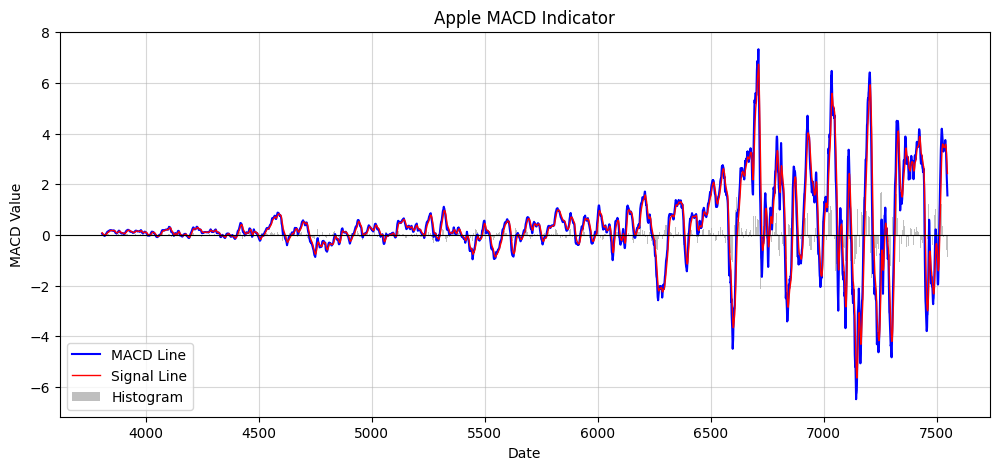


--- Generating Plots for GOOGLE ---


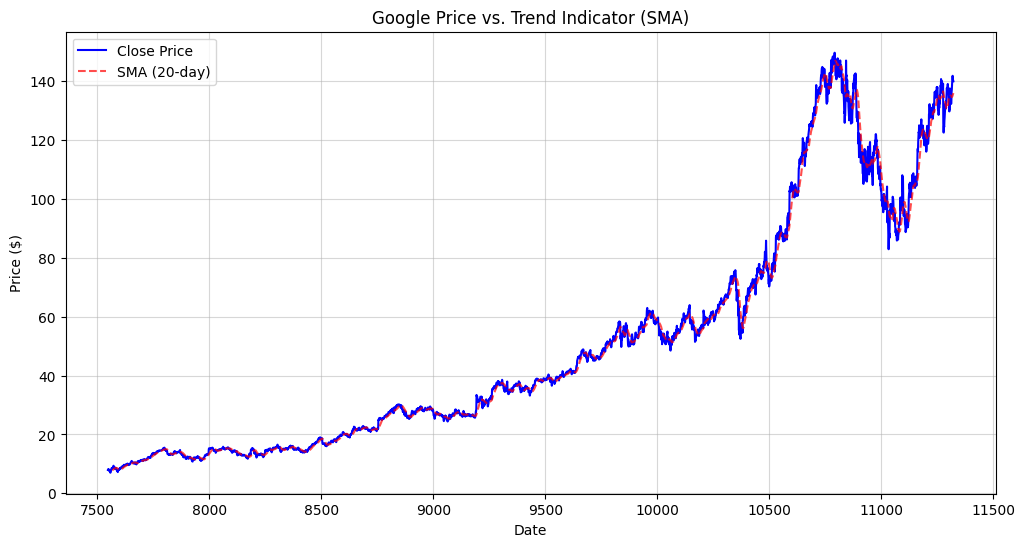

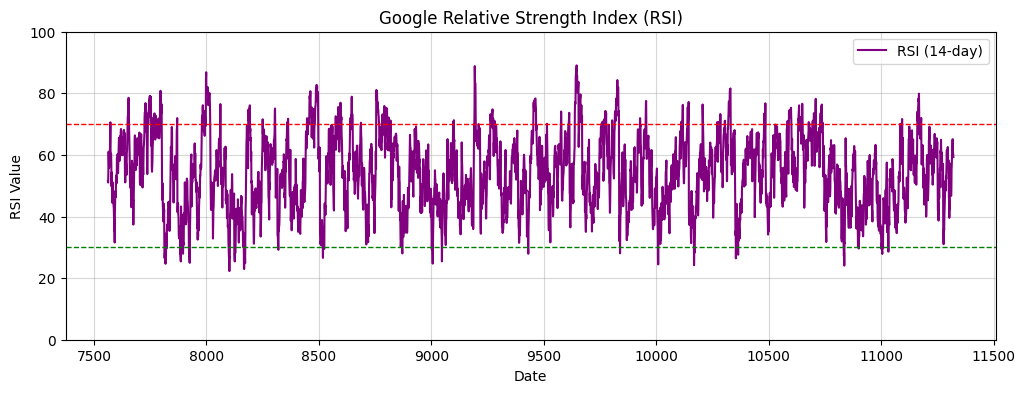

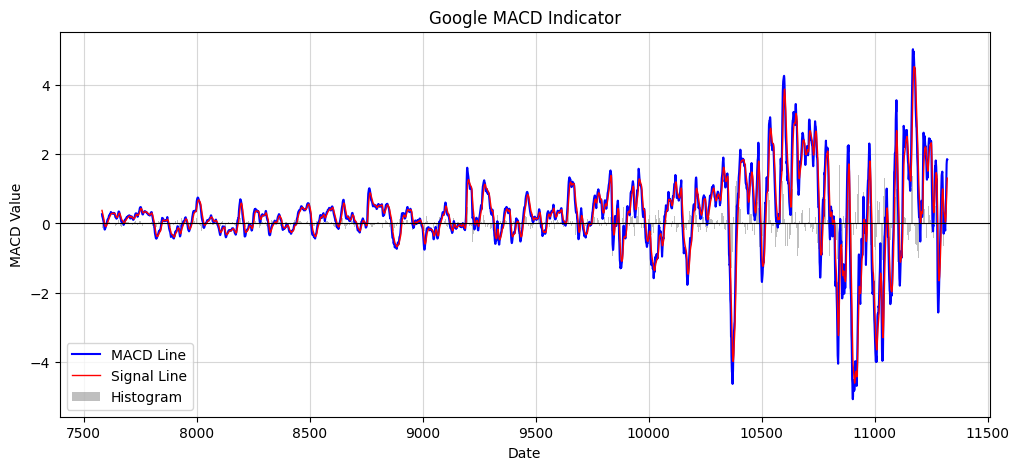


--- Generating Plots for META ---


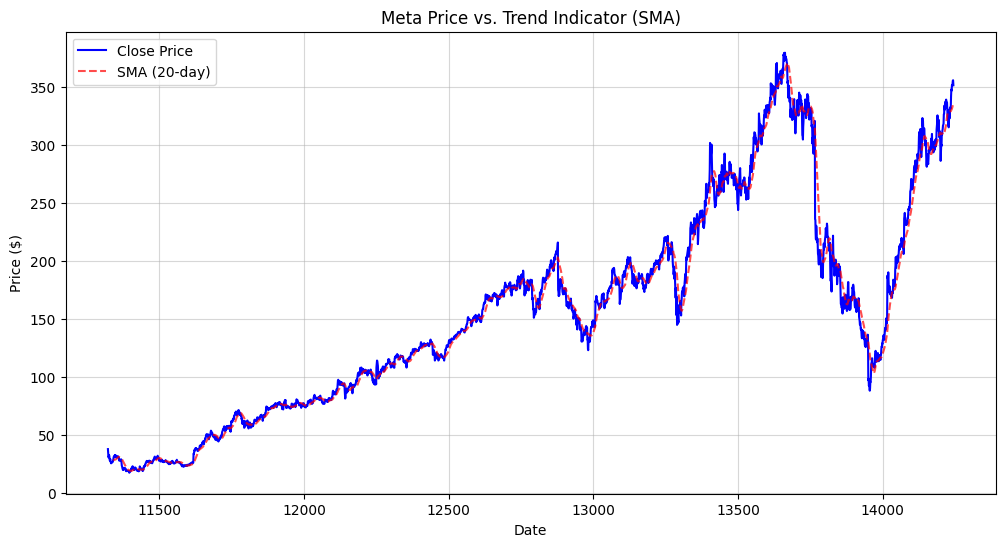

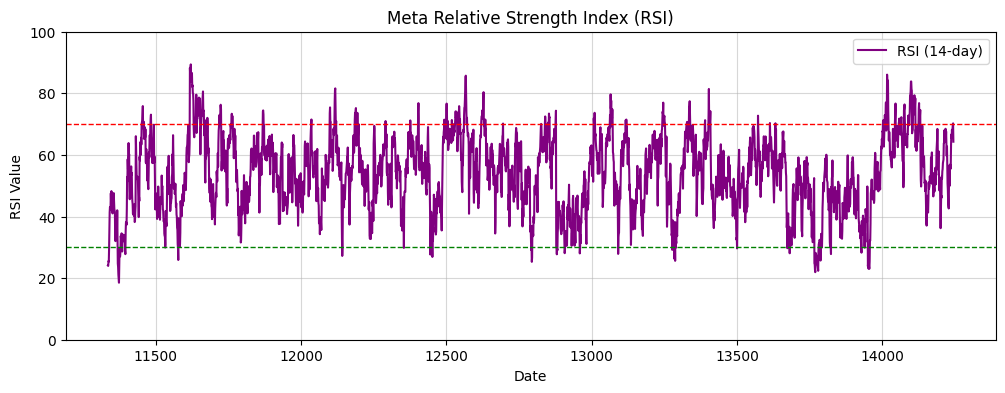

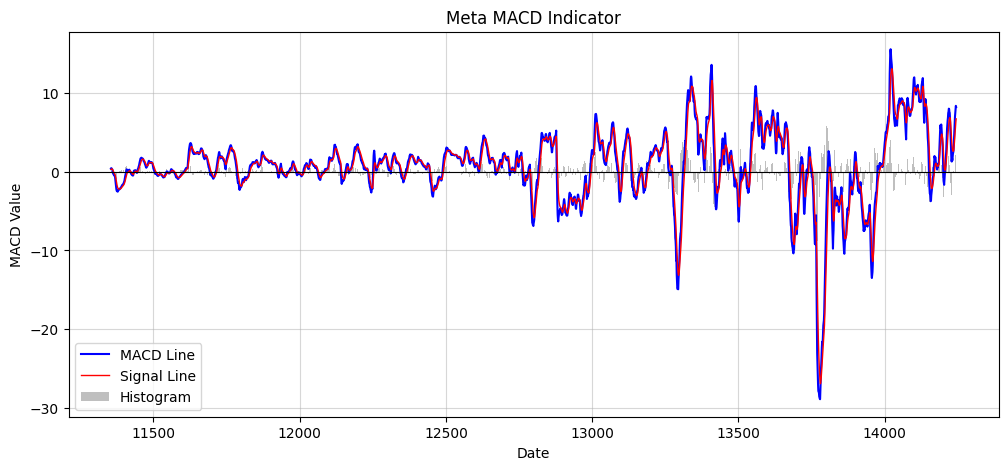


--- Generating Plots for MICROSOFT ---


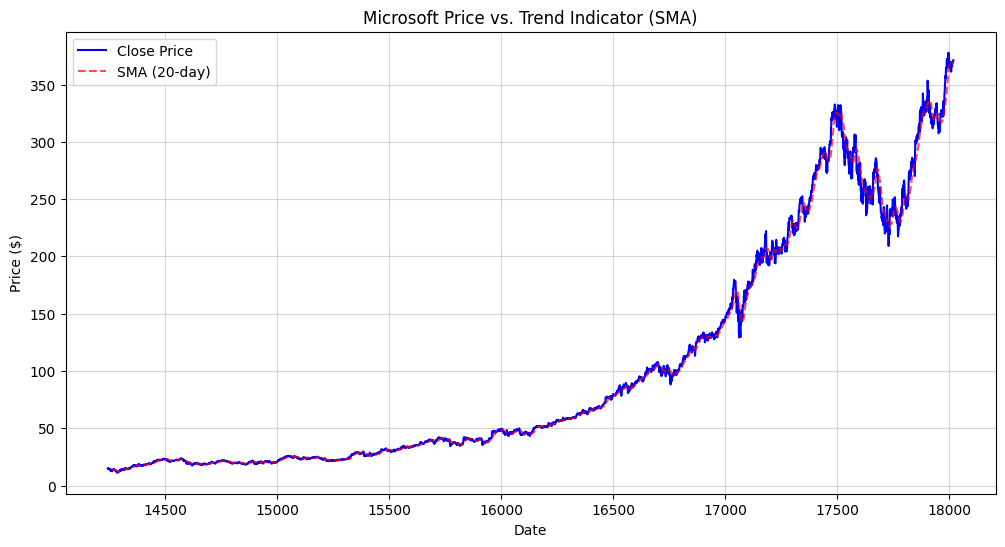

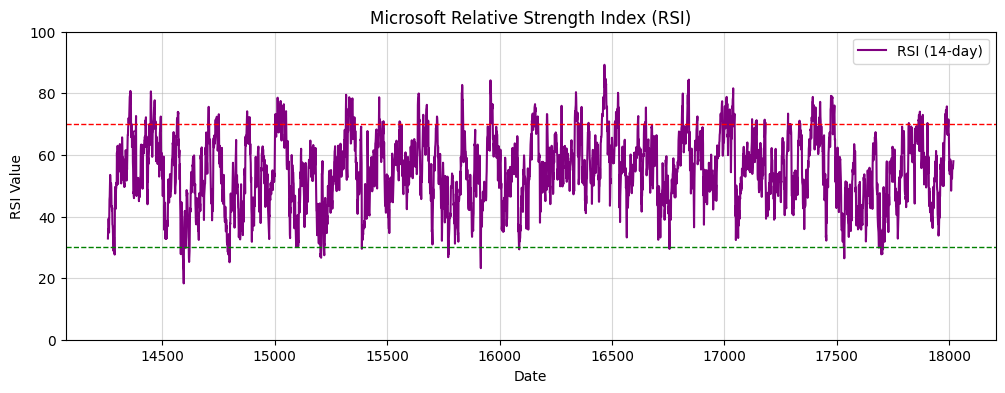

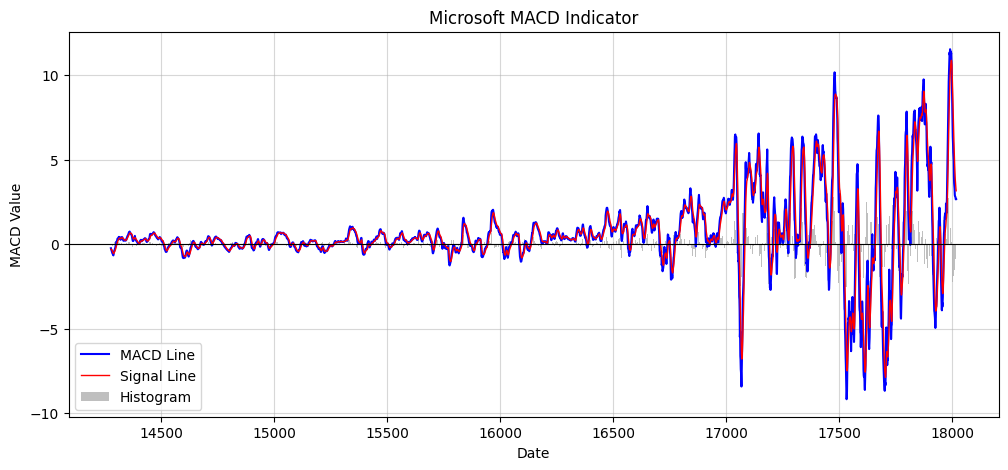


--- Generating Plots for NVIDIA ---


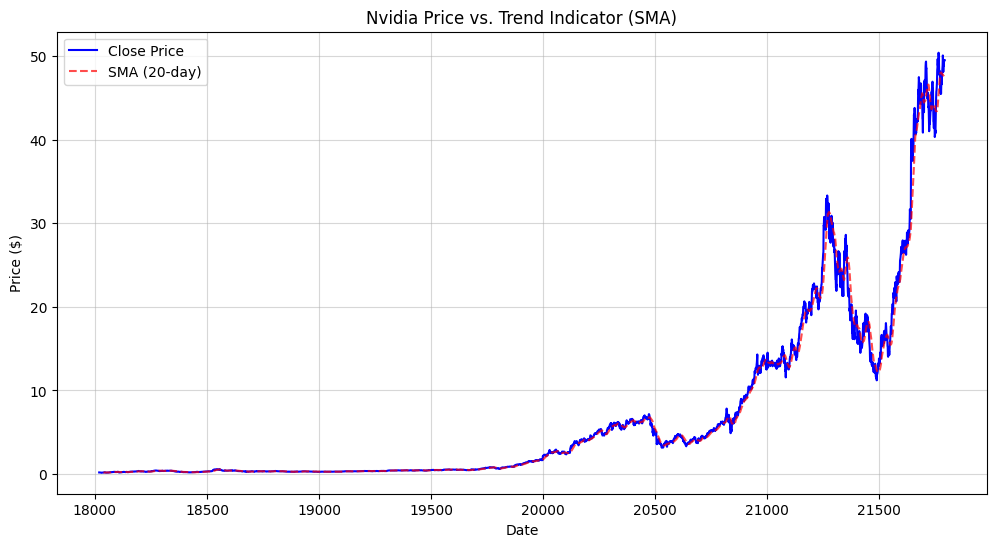

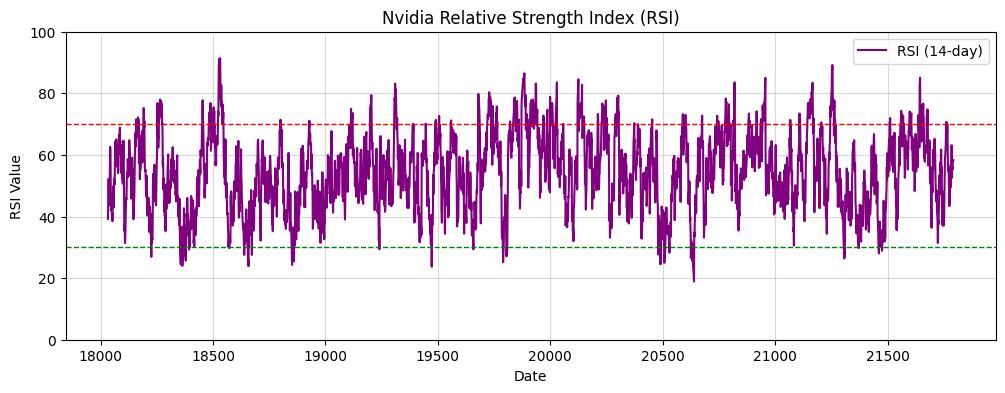

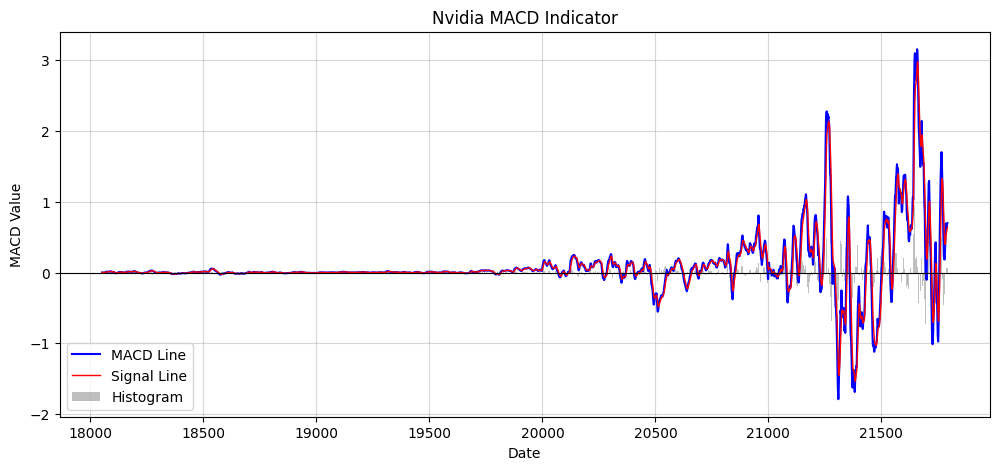

In [24]:
plot_indicators_per_company(Financial_DF)